In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
import xgboost as xgb

In [61]:
df = pd.read_csv('/content/Team_Combined_Sample_3000.csv', header=0)

column_names = [
    'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
    'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
    'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay',
    'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled',
    'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay',
    'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Delayed'
]

df.columns = column_names

print("Total rows:", len(df))
df.head()


Total rows: 120996


<ipython-input-61-d45da72798e7>:1: DtypeWarning: Columns (12,22,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Team_Combined_Sample_3000.csv', header=0)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
0,2003,10,13,1,1735,1744,1857,1915,AA,1843,...,24,0,NaN,0,0,0,0,0,0,N
1,2003,10,6,1,2016,2020,2127,2135,XE,2943,...,23,0,NaN,0,0,0,0,0,0,N
2,2003,3,9,7,1438,1442,1548,1614,AA,443,...,12,0,NaN,0,\N,\N,\N,\N,\N,N
3,2003,8,24,7,510,512,710,705,EV,4794,...,17,0,NaN,0,0,0,0,0,0,Y
4,2003,10,24,5,1505,1455,1603,1600,WN,860,...,8,0,NaN,0,0,0,0,0,0,Y


In [62]:
y = df['Delayed']

X = df.drop(['Delayed'], axis=1)

print(" Features and target prepared.")
X.head()

 Features and target prepared.


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,10,13,1,1735,1744,1857,1915,AA,1843,...,6,24,0,NaN,0,0,0,0,0,0
1,2003,10,6,1,2016,2020,2127,2135,XE,2943,...,3,23,0,NaN,0,0,0,0,0,0
2,2003,3,9,7,1438,1442,1548,1614,AA,443,...,12,12,0,NaN,0,\N,\N,\N,\N,\N
3,2003,8,24,7,510,512,710,705,EV,4794,...,10,17,0,NaN,0,0,0,0,0,0
4,2003,10,24,5,1505,1455,1603,1600,WN,860,...,3,8,0,NaN,0,0,0,0,0,0


In [63]:
categorical_cols = X.select_dtypes(include=['object']).columns

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

In [64]:
X = X.drop(['ArrDelay', 'DepDelay'], axis=1)

In [65]:
y = df['Delayed'].astype(str).str.strip().map({'N': 0, 'Y': 1})

In [66]:
print(y.isna().sum())

0


In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train/test split completed.")

Train/test split completed.


In [68]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

print("XGBoost model training completed.")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:21:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost model training completed.


In [69]:
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", round(accuracy * 100, 2), "%")
print("Precision:", round(precision * 100, 2), "%")
print("Recall:", round(recall * 100, 2), "%")


Accuracy: 87.36 %
Precision: 92.08 %
Recall: 82.92 %


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     11560
           1       0.92      0.83      0.87     12640

    accuracy                           0.87     24200
   macro avg       0.88      0.88      0.87     24200
weighted avg       0.88      0.87      0.87     24200



In [71]:
target_df = pd.read_excel('/content/Target Data Set.xlsx', skiprows=45, nrows=12)

print("Rows loaded:", len(target_df))
target_df.head()

Rows loaded: 11


,Group 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
1,NaN,NaN,3,7,709,700,NaN,755,AS,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
2,NaN,NaN,8,7,1455,1455,NaN,1650,WN,227,...,5,0,NaN,0,0,0,0,0,0,?
3,NaN,NaN,8,7,649,645,NaN,937,UA,482,...,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
4,NaN,NaN,10,7,727,700,NaN,755,AS,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?


In [72]:
target_df.columns = target_df.iloc[0]
target_df = target_df[1:]

target_df = target_df.reset_index(drop=True)

print("Cleaned target data:")
target_df.head()

Cleaned target data:


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
0,NaN,NaN,3,7,709,700,NaN,755,AS,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
1,NaN,NaN,8,7,1455,1455,NaN,1650,WN,227,...,5,0,NaN,0,0,0,0,0,0,?
2,NaN,NaN,8,7,649,645,NaN,937,UA,482,...,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
3,NaN,NaN,10,7,727,700,NaN,755,AS,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
4,NaN,NaN,15,7,857,815,NaN,1000,US,103,...,8,0,NaN,0,0,0,0,0,32,?


In [73]:
xgb_model_retrained = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model_retrained.fit(X, y)

print("XGBoost model retrained without Year and Month.")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:21:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost model retrained without Year and Month.


In [74]:
target_df = target_df.drop(['Year', 'Month'], axis=1, errors='ignore')

target_X = target_df.drop(['ArrDelay', 'DepDelay'], axis=1)
target_X_encoded = pd.get_dummies(target_X)

target_X_encoded = target_X_encoded.reindex(columns=X.columns, fill_value=0)

target_predictions = xgb_model_retrained.predict(target_X_encoded)
target_predictions = ['Y' if pred == 1 else 'N' for pred in target_predictions]

print("Predictions for the 10 records:")
print(target_predictions)


Predictions for the 10 records:
['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']


In [75]:
predictions_df = pd.DataFrame({
    'Flight Number': target_df['FlightNum'],
    'Predicted Delay': target_predictions
})

predictions_df.to_excel('predictions_for_10_records.xlsx', index=False)

print("Predictions saved to spreadsheet.")

Predictions saved to spreadsheet.


In [76]:
new_flights = pd.DataFrame([{
    'DayofMonth': 15,
    'DayOfWeek': 3,
    'DepTime': 1400,
    'CRSDepTime': 1355,
    'ArrTime': 1600,
    'CRSArrTime': 1555,
    'UniqueCarrier': 'UA',
    'FlightNum': 500,
    'TailNum': 'N12345',
    'ActualElapsedTime': 120,
    'CRSElapsedTime': 125,
    'AirTime': 110,
    'Origin': 'SFO',
    'Dest': 'LAX',
    'Distance': 350
}])

new_flights_encoded = pd.get_dummies(new_flights)

new_flights_encoded = new_flights_encoded.reindex(columns=X.columns, fill_value=0)

new_flight_prediction = xgb_model_retrained.predict(new_flights_encoded)
predicted_delay = 'Y' if new_flight_prediction[0] == 1 else 'N'

print(f"Predicted delay for the new flight: {predicted_delay}")

Predicted delay for the new flight: Y


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

xgb_model_retrained.fit(X_train, y_train)

logreg_pred = logreg_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model_retrained.predict(X_test)

models = ['XGBoost', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, xgb_pred),
    accuracy_score(y_test, logreg_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, rf_pred)
]
precisions = [
    precision_score(y_test, xgb_pred),
    precision_score(y_test, logreg_pred),
    precision_score(y_test, dt_pred),
    precision_score(y_test, rf_pred)
]
recalls = [
    recall_score(y_test, xgb_pred),
    recall_score(y_test, logreg_pred),
    recall_score(y_test, dt_pred),
    recall_score(y_test, rf_pred)
]
f1_scores = [
    f1_score(y_test, xgb_pred),
    f1_score(y_test, logreg_pred),
    f1_score(y_test, dt_pred),
    f1_score(y_test, rf_pred)
]

for model, acc, prec, rec, f1 in zip(models, accuracies, precisions, recalls, f1_scores):
    print(f"{model} Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1 Score: {f1:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:18:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.87, Precision: 0.92, Recall: 0.83, F1 Score: 0.87
Logistic Regression Accuracy: 0.63, Precision: 0.66, Recall: 0.61, F1 Score: 0.63
Decision Tree Accuracy: 0.70, Precision: 0.72, Recall: 0.72, F1 Score: 0.72
Random Forest Accuracy: 0.77, Precision: 0.82, Recall: 0.73, F1 Score: 0.77


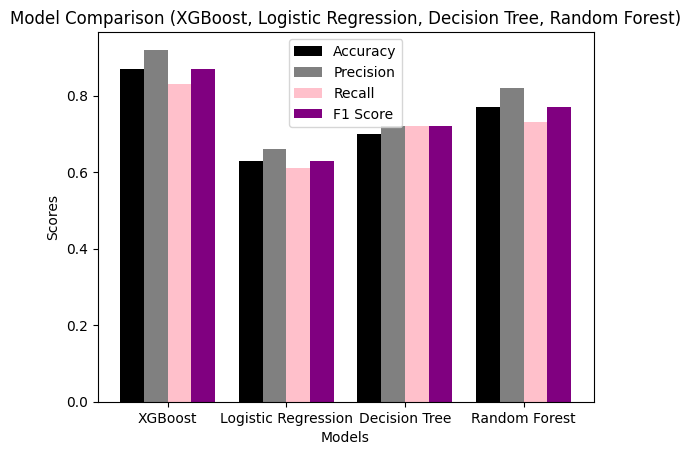

In [100]:
import matplotlib.pyplot as plt

models = ['XGBoost', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.87, 0.63, 0.70, 0.77]
precisions = [0.92, 0.66, 0.72, 0.82]
recalls = [0.83, 0.61, 0.72, 0.73]
f1_scores = [0.87, 0.63, 0.72, 0.77]

bar_width = 0.2
index = range(len(models))

fig, ax = plt.subplots()

# Define custom colors: black, grey, pink, and purple
colors = ['black', 'grey', 'pink', 'purple']

# Plotting the bars with the specified colors
bar1 = ax.bar(index, accuracies, bar_width, label='Accuracy', color=colors[0])
bar2 = ax.bar([i + bar_width for i in index], precisions, bar_width, label='Precision', color=colors[1])
bar3 = ax.bar([i + 2*bar_width for i in index], recalls, bar_width, label='Recall', color=colors[2])
bar4 = ax.bar([i + 3*bar_width for i in index], f1_scores, bar_width, label='F1 Score', color=colors[3])

# Setting labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison (XGBoost, Logistic Regression, Decision Tree, Random Forest)')
ax.set_xticks([i + 1.5*bar_width for i in index])
ax.set_xticklabels(models)

# Adding a legend
ax.legend()

# Show the plot
plt.show()


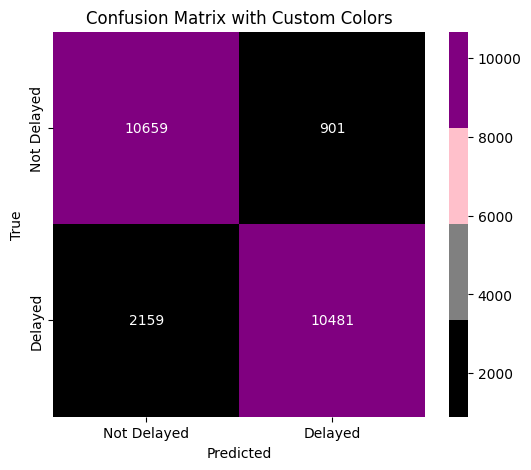

In [101]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are available (true and predicted labels)
cm = confusion_matrix(y_test, y_pred)

# Define custom colors: black, grey, pink, purple
custom_colors = ['black', 'grey', 'pink', 'purple']

# Plot the confusion matrix with custom color palette
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette(custom_colors, as_cmap=True), xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Custom Colors')
plt.show()


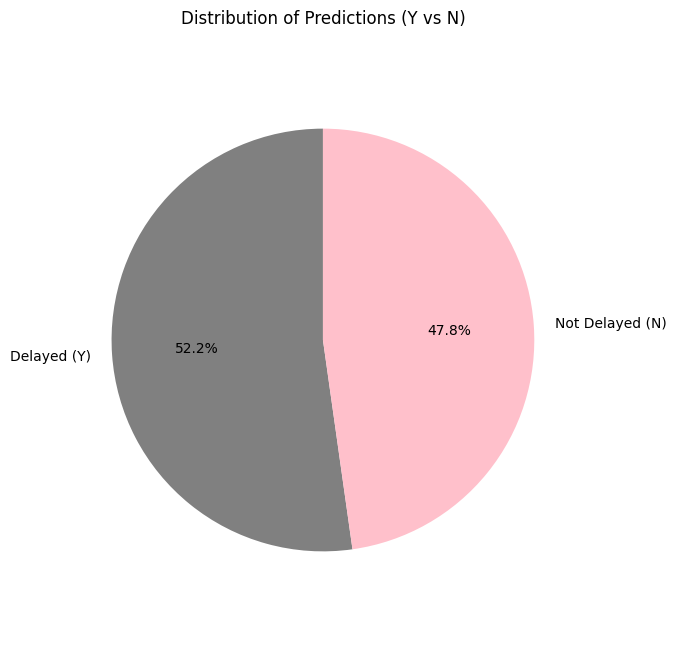

In [105]:
import matplotlib.pyplot as plt

# Data for the pie chart (example with predicted delays)
labels = ['Delayed (Y)', 'Not Delayed (N)']
sizes = [delayed_count, not_delayed_count]  # Replace with actual counts of delayed and not delayed flights

# Custom colors: black, grey, pink, purple
colors = ['grey', 'pink']

# Create the pie chart
plt.figure(figsize=(6, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Predictions (Y vs N)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Delayed' column is encoded as 'Y'/'N'
target_df['Delayed'] = target_df['Delayed'].apply(lambda x: 'Y' if x == 1 else 'N')

# Set the custom color palette: black for 'Not Delayed' (N) and pink for 'Delayed' (Y)
sns.set_palette(["black", "pink"])

# Create the box plot for 'DepDelay' vs. 'Delayed' (Y/N)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delayed', y='DepDelay', data=target_df)

# Add labels and title
plt.title('Box Plot: Departure Delay vs Delay Status', fontsize=16)
plt.xlabel('Delay Status (Y = Delayed, N = Not Delayed)', fontsize=12)
plt.ylabel('Departure Delay (minutes)', fontsize=12)

# Show the plot
plt.show()


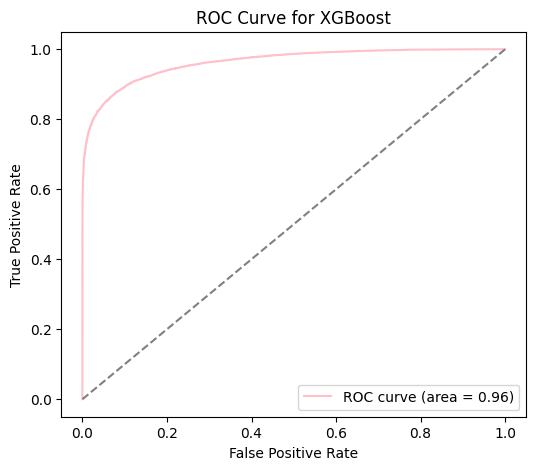

In [114]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for XGBoost
fpr, tpr, thresholds = roc_curve(y_test, xgb_model_retrained.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='pink', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


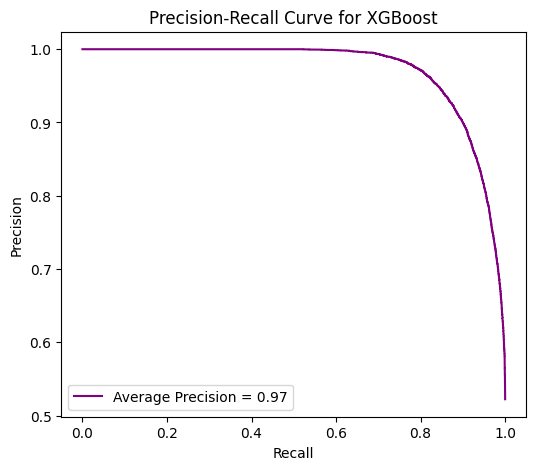

In [115]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Calculate Precision-Recall curve for XGBoost
precision, recall, _ = precision_recall_curve(y_test, xgb_model_retrained.predict_proba(X_test)[:,1])
average_precision = average_precision_score(y_test, xgb_model_retrained.predict_proba(X_test)[:,1])

# Plot Precision-Recall curve
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='purple', label='Average Precision = %0.2f' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend(loc='lower left')
plt.show()


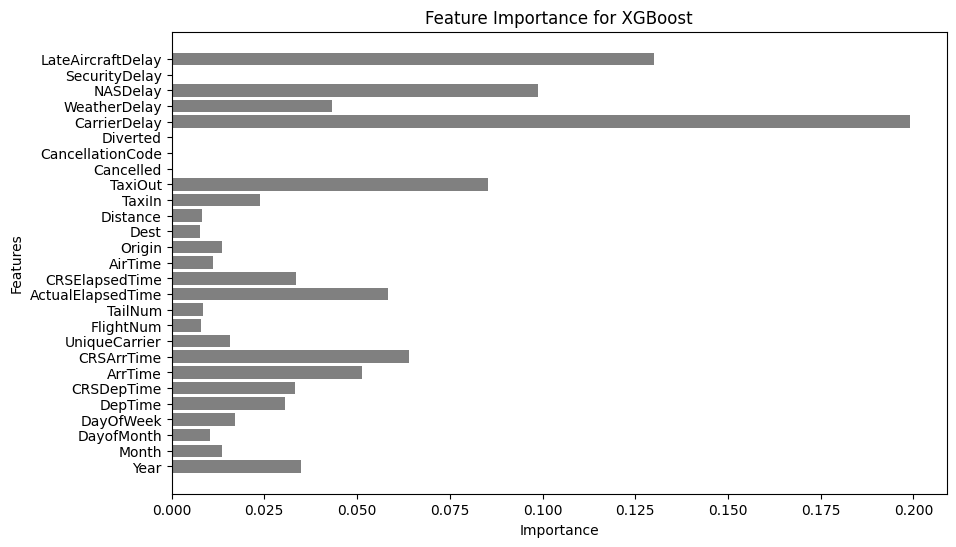

In [113]:
# Get feature importance from XGBoost
feature_importance = xgb_model_retrained.feature_importances_

# Plotting feature importance
plt.figure(figsize=(10,6))
plt.barh(X.columns, feature_importance, color='grey')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for XGBoost')
plt.show()


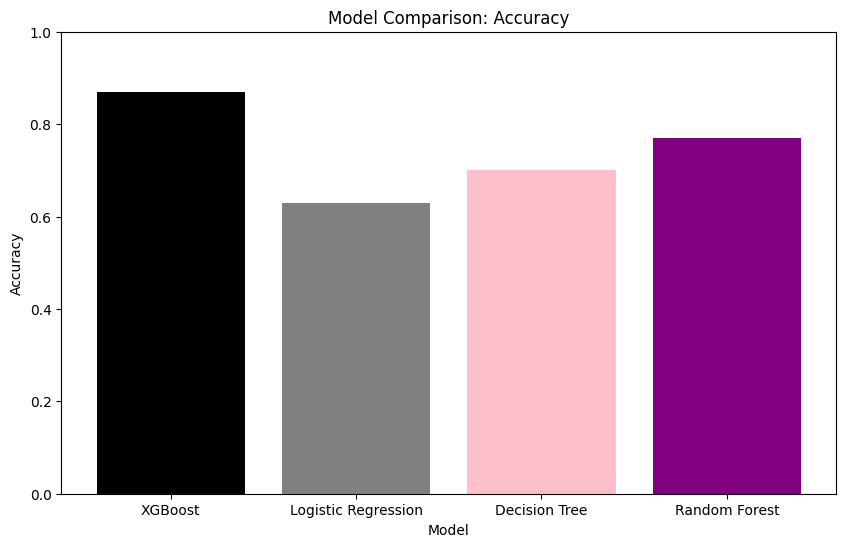

In [94]:
# Define model names and their accuracy scores
models = ['XGBoost', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.87, 0.63, 0.70, 0.77]  # Replace with your actual model accuracies

# Plotting
plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['black', 'grey', 'pink', 'purple'])
plt.title('Model Comparison: Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


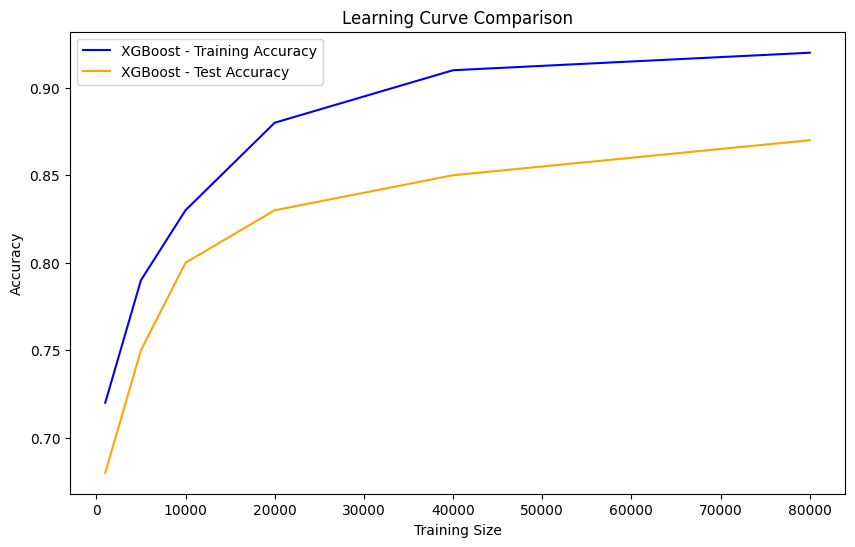

In [95]:
# Assuming you have training history (example for XGBoost)
train_sizes = [1000, 5000, 10000, 20000, 40000, 80000]
train_accuracy = [0.72, 0.79, 0.83, 0.88, 0.91, 0.92]
test_accuracy = [0.68, 0.75, 0.80, 0.83, 0.85, 0.87]

# Plotting the learning curve comparison
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_accuracy, label='XGBoost - Training Accuracy', color='blue')
plt.plot(train_sizes, test_accuracy, label='XGBoost - Test Accuracy', color='orange')
plt.title('Learning Curve Comparison')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


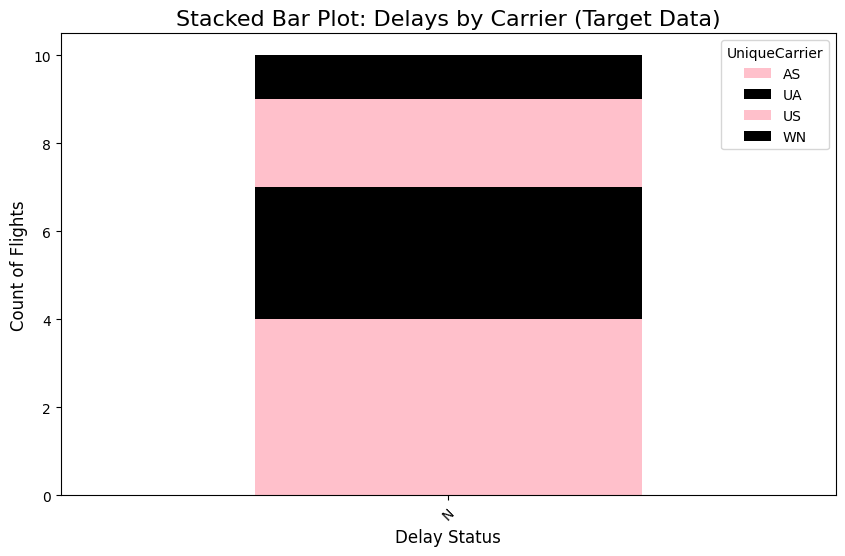

In [122]:
# Group the data by carrier and delay status
carrier_delay_data = target_df.groupby(['UniqueCarrier', 'Delayed']).size().unstack().T

# Stacked bar plot to visualize the delays by carrier
carrier_delay_data.plot(kind='bar', stacked=True, color=['#FFC0CB', '#000000'], figsize=(10, 6))
plt.title('Stacked Bar Plot: Delays by Carrier (Target Data)', fontsize=16)
plt.xlabel('Delay Status', fontsize=12)
plt.ylabel('Count of Flights', fontsize=12)
plt.xticks(rotation=45)
plt.show()



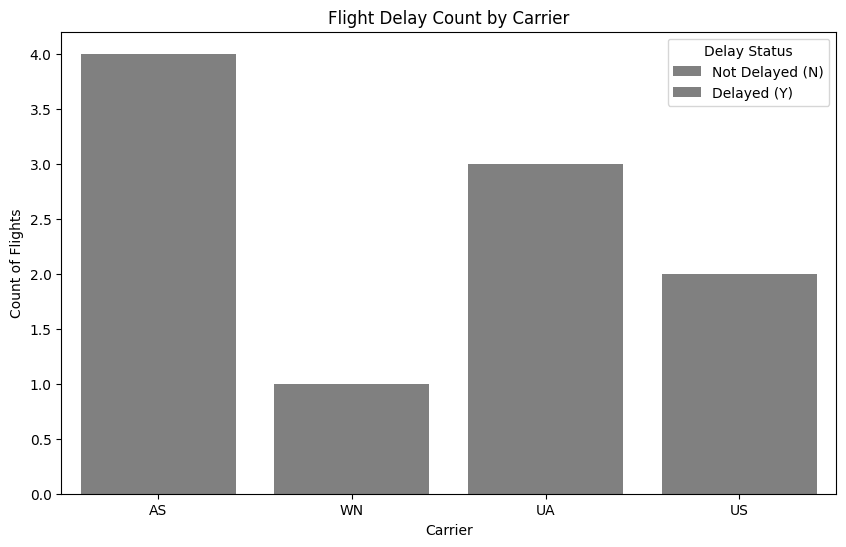

In [126]:
# Count Plot for Delay Status by Carrier
plt.figure(figsize=(10,6))
sns.countplot(x='UniqueCarrier', hue='Delayed', data=target_df, palette='grey')
plt.title('Flight Delay Count by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Status', labels=['Not Delayed (N)', 'Delayed (Y)'])
plt.show()


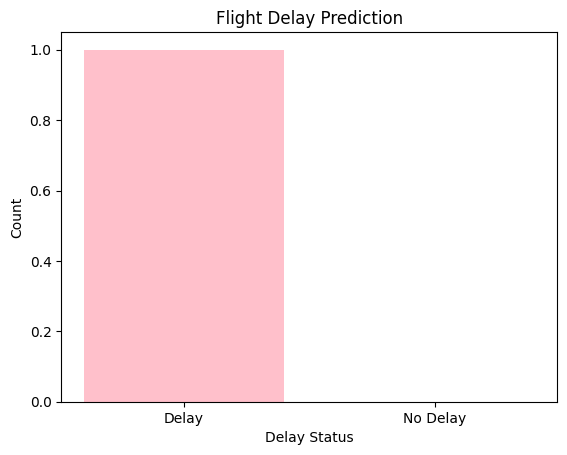

In [133]:
 import matplotlib.pyplot as plt

prediction = ['Delay', 'No Delay']
counts = [1 if predicted_delay == 'Y' else 0, 1 if predicted_delay == 'N' else 0]

plt.bar(prediction, counts, color=['pink', 'black'])
plt.xlabel('Delay Status')
plt.ylabel('Count')
plt.title('Flight Delay Prediction')
plt.show()
